# Problem 3

### Library import & Deta set

In [179]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize

(1, 40)


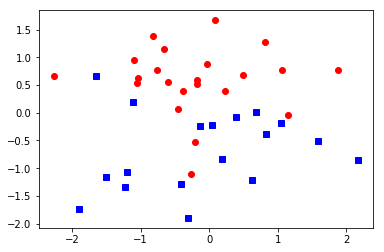

In [180]:
n = 40
omega = np.random.randn(1, 1)
noise = 0.8 * np.random.randn(n, 1)
x = np.random.randn(n, 2)
y = 2 * ((omega * x[:, 0] + x[:, 1] + noise[:, 0]) > 0) - 1
data = np.c_[x, y.T]

def plotData(data, axes=None):
    # Get indexes for class -1 and class 1
    neg = data[:,2] == -1
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    plt.plot(data[pos][:,0], data[pos][:,1], 'o', color='red')
    plt.plot(data[neg][:,0], data[neg][:,1], 'gs', color='blue');
    
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

plotData(data)

K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = y[i]*y[j]*np.dot(X[i, :], X[j, :].T)
print(y.T.shape)    


In [207]:
def project(q):
    for i in range(n):
        if q[0, i] >= 1:
            q[0, i] = 1
        elif q[0, i] < 0:
            q[0, i] = 0
    return q


def descent(initial_position, learning_rate, t):
    """
    最小値を求める関数
    :param numpy.ndarray initial_position: 関数の初期位置
    :param float learning_rate: 学習率
    :param int t: 学習回数
    """
    a = initial_position
    l = np.ones_like(a)
    for _ in range(t):
        q = a - lerning_rate*((1/(2*lam))*np.dot(K, a.T) - l)
        P = project(q)
        a = P
    return a


def L(alpha):
    a = alpha
    l = np.ones_like(a)
    return np.dot(a,l.T)- (1/(4*lam))*np.dot(a,np.dot(K,a.T))


def w(a):
    return (1/(2*lam))*sum((a.T)*(y*X))


def J(a):
    w = (1/(2*lam))*sum((a.T)*(y*X))   
    l = np.ones_like(y)
    
    u = np.zeros_like(y)
    m = np.matrix(l.reshape(-1) - (y.reshape(-1)*np.dot(X, w.T)))
    f = 0
    for i in range(n):
        if m[0, i] <= 0:
            m[0, i] = 0
        f += m[0, i]
    return f + lam*np.dot(w, w.T)



def descent_lag(L, initial_position, learning_rate, t):
    """
    Lagrangeの収束を可視化する関数
    :param function J: 最小値を見つけたい関数
    :param numpy.ndarray initial_position: 関数の初期位置
    :param float learning_rate: 学習率
    :param int t: 学習回数
    """
    a = initial_position
    l = np.ones_like(a)
    for i in range(t):
        q = a - learning_rate*((1/(2*lam))*np.dot(K, a.T).T- l)
        P = project(q)
        a = P
        plt.plot(i, L(a), 'o', color = 'Black', markersize = 2)
        plt.ylabel('Lagrange-function: L(a)')
        plt.xlabel('inteation: t') 
        

def descent_hinge(J, initial_position, learning_rate, t):
    """
    Lagrangeの収束を可視化する関数
    :param function J: 最小値を見つけたい関数
    :param numpy.ndarray initial_position: 関数の初期位置
    :param float learning_rate: 学習率
    :param int t: 学習回数
    """
    a = initial_position
    l = np.ones_like(a)
    for i in range(t):
        q = a - learning_rate*((1/(2*lam))*np.dot(K, a.T).T- l)
        P = project(q)
        a = P
        plt.plot(i, J(a), 'o', color = 'Black', markersize = 2)
        plt.ylabel('Loss-function: J(a)')
        plt.xlabel('inteation: t') 



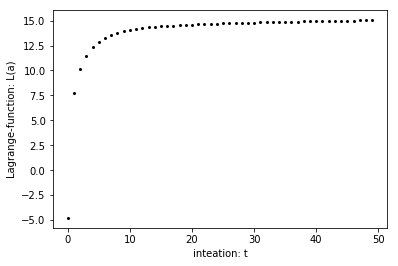

In [208]:
lam = 0.1
learning_rate = 0.01
a0 = 10*np.ones_like(y.T)
t = 50

descent_lag(L, a0, learning_rate, t)

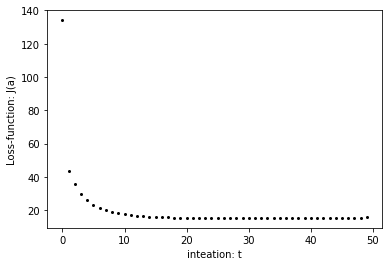

In [209]:
descent_hinge(J, a0, learning_rate, t)